In [19]:
import numpy as np
from keras.datasets import mnist
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Dimension Reduction

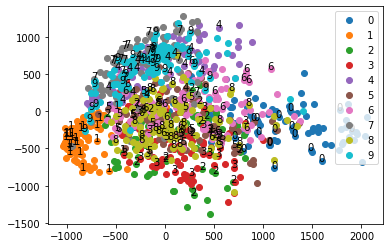

In [20]:
training_set, test_set = mnist.load_data()

X_train, y_train = training_set
X_test, y_test = test_set

X_train_flatten = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
 
pca = PCA()
pca.fit(X_train_flatten)
 
X_test_flatten = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
Z_test_flatten = pca.transform(X_test_flatten)
Z_test_subset, _, y_test_subset, _ = train_test_split(Z_test_flatten, y_test, train_size=0.1, random_state=12345)
 
plt.figure()
for i in range(10):
    X_tmp = Z_test_subset[y_test_subset == i]
    plt.plot(X_tmp[:, 0], X_tmp[:, 1], 'o')
    for j in range(0, len(X_tmp), 5):
        plt.annotate(i, (X_tmp[j, 0], X_tmp[j, 1]), ha='center')
plt.legend(range(10))
plt.show()

In [21]:
#X_train = (X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
#X_test = (X_test-np.mean(X_test,axis=0))/np.std(X_test,axis=0)

input_shape = (28, 28, 1)
 
inputs = layers.Input(shape=input_shape)
 
flatten = layers.Flatten()(inputs)
dense1 = layers.Dense(50, activation='tanh')(flatten)
dense2 = layers.Dense(50, activation='tanh')(dense1)
latent = layers.Dense(2, activation='linear')(dense2)
dense3 = layers.Dense(50, activation='tanh')(latent)
dense4 = layers.Dense(50, activation='tanh')(dense3)
dense5 = layers.Dense(28 * 28, activation='relu')(dense4)
outputs = layers.Reshape(target_shape=(28, 28, 1))(dense5)
 
model = keras.Model(inputs=inputs, outputs=outputs)
 
model.compile(loss=keras.metrics.mse, optimizer="adam")

In [22]:
batch_size = 128
epochs = 50
model.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 6851.4854 - val_loss: 6405.2720
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 6201.8618 - val_loss: 5897.3081
Epoch 3/50
375/375 [==============================] - 1s 4ms/step - loss: 5782.7031 - val_loss: 5563.6748
Epoch 4/50
375/375 [==============================] - 1s 4ms/step - loss: 5507.9731 - val_loss: 5348.1514
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 5332.7319 - val_loss: 5214.1016
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 5225.4170 - val_loss: 5134.6655
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 5163.1318 - val_loss: 5090.6313
Epoch 8/50
375/375 [==============================] - 1s 3ms/step - loss: 5129.4365 - val_loss: 5068.2295
Epoch 9/50
375/375 [==============================] - 1s 4ms/step - loss: 5112.6890 - val_loss: 5057.9893
Epoch 10/50
375/375 [=========================

<Figure size 432x288 with 0 Axes>

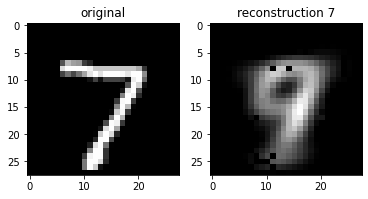

In [23]:
X_gen = model.predict(X_test)

example_id = 0
plt.figure()
fig, axs = plt.subplots(1, 2)
axs[0].imshow(X_test[example_id, :, :], cmap='gray')
axs[0].set_title('original')
axs[1].imshow(X_gen[example_id, :, :], cmap='gray')
axs[1].set_title(f'reconstruction {y_test[example_id]}')
plt.show()

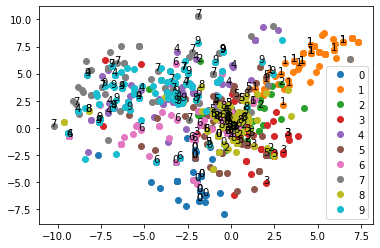

In [27]:
compression_model = keras.Model(inputs=inputs, outputs=latent)
 
X_test_subset, _, y_test_subset, _ = train_test_split(X_test, y_test, train_size=0.1, random_state=12345)
X_compressed = compression_model.predict(X_test_subset)
 
plt.figure()
for i in range(10):
    X_tmp = X_compressed[y_test_subset == i]
    plt.plot(X_tmp[:, 0], X_tmp[:, 1], 'o')
    for j in range(0, len(X_tmp), 5):
        plt.annotate(i, (X_tmp[j, 0], X_tmp[j, 1]), ha='center')
plt.legend(range(10))
plt.show()

In [31]:
decoder = keras.Model(inputs=[latent], outputs=outputs)
input_data = np.array([[-12.0, -2.0]])
random_img = decoder.predict(input_data)
plt.imshow(random_img[0, :, :, 0], cmap='gray')
plt.show()

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: dense_14/BiasAdd:0


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'") at layer "flatten_2". The following previous layers were accessed without issue: []

In [32]:
xs = np.linspace(-10, 6, 25)
ys = np.linspace(-7, 10, 25)
all_img = np.zeros([len(xs)*28, len(ys)*28], dtype=np.float32)
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        input_data = np.array([[x, y]])
        random_img = decoder.predict(input_data)
        all_img[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = random_img[0, :, :, 0]
all_img[all_img > 1.0] = 1.0
plt.imshow(all_img[:, :], cmap='gray')
plt.show()

ValueError: in user code:

    c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\engine\input_spec.py:269 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model_9: expected shape=(None, 28, 28, 1), found shape=(None, 2)
